# Import necessary libraries

In [17]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 37.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import yfinance as yf

# Import Stock Quote

In [9]:
df=yf.download('AAPL', start='2012-01-01', end='2020-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643499,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783867,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917508,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897017,394024400
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.992004,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994537,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679642,124486200


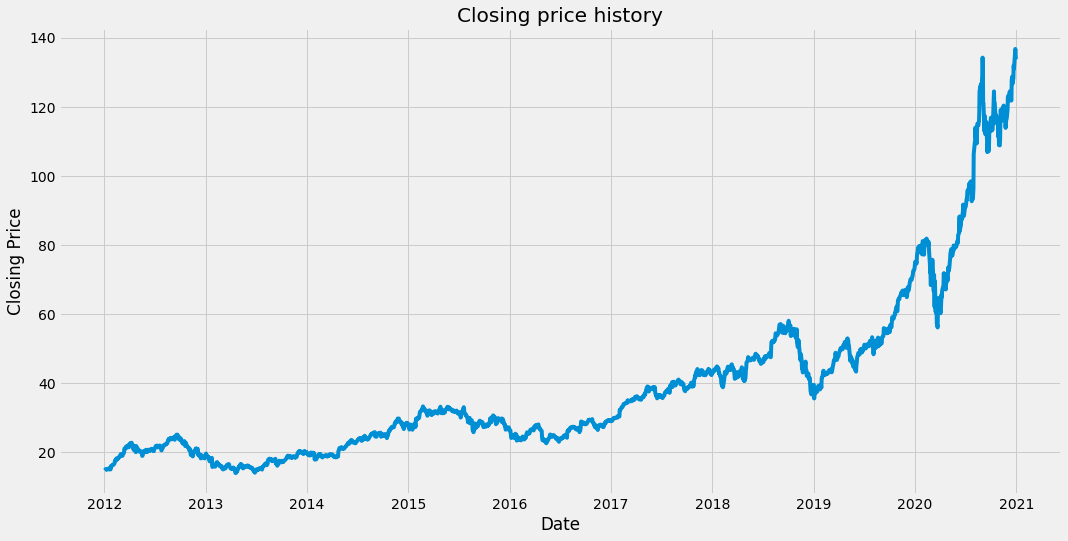

In [10]:
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [11]:
df2 = df.filter(['Close'])
dataset=df2.values

In [12]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1812

# Scale the data 

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [1.        ],
       [0.98517215],
       [0.97580299]])

# Creating training dataset

In [15]:
train_data = scaled_data[0:training_data_len, :]

#split the dataset into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if (i<=60):
    print(X_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]



In [22]:
X_train.shape

(1752, 60, 1)

In [16]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM model

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 41s 21ms/step - loss: 2.3448e-04


In [24]:
# Create testing dataset
test_data=scaled_data[training_data_len-60: ,  :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert data to numpy array
x_test = np.array(x_test)

#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# Get the prediction

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

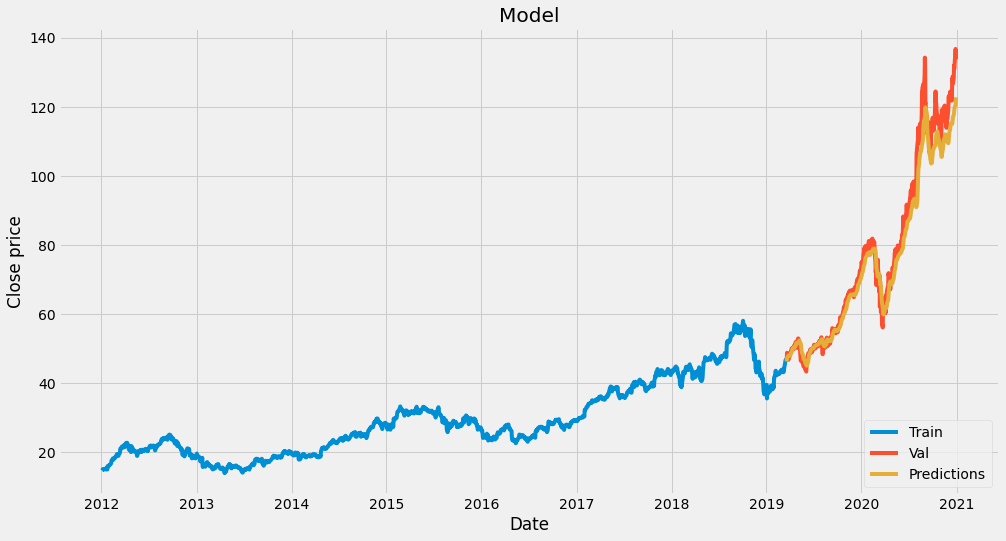

In [28]:
#Plot the data
train = df2[: training_data_len]
valid = df2[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [29]:
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,46.200855
2019-03-20,47.040001,46.572639
2019-03-21,48.772499,46.902748
2019-03-22,47.762501,47.376461
2019-03-25,47.185001,47.742725
...,...,...
2020-12-23,130.960007,118.987518
2020-12-24,131.970001,119.761581
2020-12-28,136.690002,120.512474
